# Detecting Parkinson's Disease using XGBoost

## B.Tech 7th sem Minor Project
by ARINDOM SHARMA, POPEE BORAH, AMRIT KR. BARUAH, JILI TALI & ADITYA CHAKRABORTY

Internal Mentor: Mrs. Mousoomi Borah (H.O.D CSE Department, KU)

External Mentor: 

## Load/Read the Dataset 

##### Import the dataframe using Pandas use to represent data in tabular form

##### Load/Read the Dataset and printing first 5 rows

In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Arindom\Downloads\parkinsons (7).data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Data Pre-processing

##### ".shape" attribute, which will return the size of the dataset i.e the number of rows and columns.

In [4]:
df.shape 

(195, 24)

##### ".info()" method is used to examine each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

##### ".describe()" gives Data summary statictic and disable non-truncated dataframe.

##### Hence, here 'name' column is gone as it is of datatype object and is not comparable with other dataframe of int and float.

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


##### ".corr()" gives correlation between a pair of feature

In [7]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


##### Then we draw the heatmap to easily examine the result of correlation in the previous step

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True);

##### Count number of active PD patients (1) and inactive patients (0)

In [9]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

##### Plot status column using bar chart.

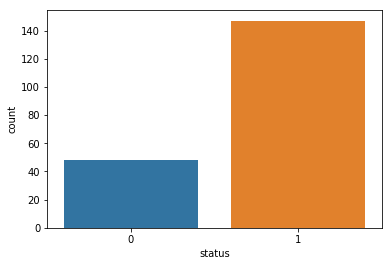

In [10]:
import seaborn as sns

sns.countplot(df['status'],label="Count")

##### Since the status column is located in the middle of dataset, we need to move it to the far right, so we can easily slice the dataset.

In [11]:
cols = list(df)
cols.insert(24, cols.pop(cols.index('status')))

cols

['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE',
 'status']

##### Display all rows and columns after moving status to extreme right

In [12]:
df = df.loc[:, cols]
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,1
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,1


## Data Modelling

In [13]:
#importing necessary libraries
import xgboost as xgb
import pandas as pd
import numpy as np

##### Separate the target variable and rest of the variables using .iloc to subset the data.

In [14]:
X,y = df.iloc[:,1:-1],df.iloc[:,-1]

In [15]:
#print(y)

In [16]:
#print(X)

#####  XGBoost uses DMatrices. A DMatrix can contain both the features and the target. It is an optimized data structure that is known to provide acclaimed performance and efficiency gains.

In [17]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

##### Splitting the dataset. We take a test size of 20% and set the random state to 42 to ensure we’re getting the same results.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [19]:
#printing the rows and columns of testing and training set.
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (156, 22)
Training Labels Shape: (156,)
Testing Features Shape: (39, 22)
Testing Labels Shape: (39,)


##### The next step is to create an instance of the XGBoost Regressor class and pass the parameters as arguments. The parameters are explained below:

1. objective =’binary:hinge’ specifies that the learning task.

2. colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling will occur once in every boosting iteration. This number ranges from 0 to 1.

3. learning_rate is the step size shrinkage and is used to prevent overfitting. This number ranges from 0 to 1.

4. max_depth specifies the maximum depth of the tree. Increasing this number makes the model complex and increases the possibility of overfitting. The default is 6.

5. n_estimators is the number of boosted trees to fit

6. alpha: L1 regularization on leaf weights. A large value leads to more regularization. Increasing this number makes the model more conservative.

In [20]:
xg_reg = xgb.XGBRegressor(objective ='binary:hinge', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10) #learning_rate = 0.1


##### Fit the regressor to the training set and make predictions on the test set using the .fit() and .predict() methods.

In [21]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)


#####  Compute and print RMSE and accuracy of the model.

In [22]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

from sklearn.metrics import accuracy_score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, preds)*100))

RMSE: 0.277350
XGBoost model accuracy score: 92.3077


##### Now we will use the k-fold cross-validation which is use to estimate the skill of our ML model on unseen data.

We now specify a new variable params to hold all the parameters apart from n_estimators because we’ll use num_boost_rounds from the cv() utility. The parameters taken by the cv() utility are explained below:

1. dtrain is the data to be trained.

2. params specifies the booster parameters.

3. nfold is the number of folds in the cross validation function.

4. num_boost_round is the number of boosting iterations.

5. early_stopping_rounds activates early stopping. CV error needs to decrease at least every round(s) to continue.

6. metrics are the evaluation metrics to be watched in the cross validation.

7. as_pandas if True will return a pandas dataframe; if false it will return a numpy array.

In [23]:
# Create the parameter dictionary: params
params = {"objective":"binary:hinge",'colsample_bytree': 0.3,'learning_rate': 0.3,
                'max_depth': 5, 'alpha': 10}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=30,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=43)
    
# Print cv_results
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.496113,0.005460,0.460401,0.195016
1,0.496113,0.005460,0.460401,0.195016
2,0.496113,0.005460,0.460401,0.195016
3,0.427551,0.038619,0.413115,0.193059
4,0.386898,0.034045,0.358827,0.221406


In [24]:
#Final boosting round metric.
c=(cv_results["test-rmse-mean"]).tail(1)
print(c)

10    0.281145
Name: test-rmse-mean, dtype: float64


## Visualizing Feature Importance in XGBoost

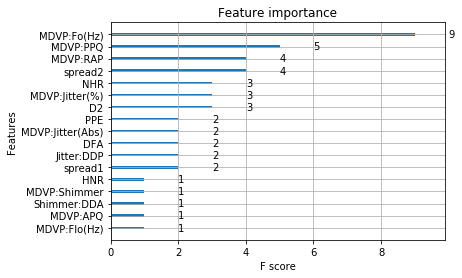

In [25]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [14, 5]
plt.show()

##### As you can see the feature MDVP.Fo(Hz) i.e Average vocal fundamental frequency has been given the highest importance score among all the features. Thus XGBoost also gives you a way to do Feature Selection.

## Conclusion:

1. In our project we have used XGBoost machine learning algorithm.

2. An accuracy of 92.3077% was provided by the machine learning model with RMSE of 0.277350 which is quite good.

3. Also on computing the k-fold cross validation to test the model, the model gives Mean Test RMSE of 0.281145 which is very close to the RMSE given by our model initially.

4. The proposed model is thus a reliable model to detect Parkinson’s disease due to its efficient accuracy rates.

5. Finally using the XGBoost’s plot_importance() function we have found out that the feature MDVP.Fo(Hz) (i.e. Average vocal fundamental frequency) has the highest importance score among all the features.

## Future Scope:

Though the model works efficiently, this is limited by the richness of the dataset with which it is being trained. The selected dataset, has only 197 instances, hence a dataset with more no of samples would help the model generalize better. The proposed model is thus a reliable model to detect Parkinson’s disease due to its efficient accuracy rates.
